In [1]:
import os
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt

import pylab
from scipy.stats import norm

from invisible_cities.core.core_functions import shift_to_bin_centers
import invisible_cities.core.fit_functions  as fitf

In [44]:
filepath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/CTR_studies/data_ctr/data_script_Paola/'

thresholds = ['0.5']
n_pes      = [1, 2, 10]

reco_r1           = [[] for i in range(len(n_pes))]
reco_phi1         = [[] for i in range(len(n_pes))]
reco_z1           = [[] for i in range(len(n_pes))]
reco_r2           = [[] for i in range(len(n_pes))]
reco_phi2         = [[] for i in range(len(n_pes))]
reco_z2           = [[] for i in range(len(n_pes))]
first_sipm1_1     = [[] for i in range(len(n_pes))]
first_time1_1     = [[] for i in range(len(n_pes))]
first_sipm2_1     = [[] for i in range(len(n_pes))]
first_time2_1     = [[] for i in range(len(n_pes))]
true_time1        = [[] for i in range(len(n_pes))]
true_time2        = [[] for i in range(len(n_pes))]
max_hit_distance1 = [[] for i in range(len(n_pes))]
max_hit_distance2 = [[] for i in range(len(n_pes))]
event_ids         = [[] for i in range(len(n_pes))]

for n, npe in enumerate(n_pes):
    for nt, th in enumerate(thresholds):
        for n_file in range(0, 100, 10):
            try:
                my_file = filepath + f'tof_coincidences_Paola_npe{npe}_thr{th}_{n_file}_10_4_4_4_2.npz'
                #print(my_file)
                d = np.load(my_file)
            except FileNotFoundError:
                continue

            for i in d['a_reco_r1']:
                reco_r1[n].append(i)
            for i in d['a_reco_phi1']:
                reco_phi1[n].append(i)
            for i in d['a_reco_z1']:
                reco_z1[n].append(i)
            for i in d['a_reco_r2']:
                reco_r2[n].append(i)
            for i in d['a_reco_phi2']:
                reco_phi2[n].append(i)
            for i in d['a_reco_z2']:
                reco_z2[n].append(i)
            for i in d['a_first_sipm1_1']:
                first_sipm1_1[n].append(i)
            for i in d['a_first_time1_1']:
                first_time1_1[n].append(i)
            for i in d['a_first_sipm2_1']:
                first_sipm2_1[n].append(i)
            for i in d['a_first_time2_1']:
                first_time2_1[n].append(i)
            for i in d['a_true_time1']:
                true_time1[n].append(i)
            for i in d['a_true_time2']:
                true_time2[n].append(i)
            for i in d['a_max_hit_distance1']:
                max_hit_distance1[n].append(i)
            for i in d['a_max_hit_distance2']:
                max_hit_distance2[n].append(i)
            for i in d['a_event_ids']:
                event_ids[n].append(i)
    
for n in range(len(n_pes)):
    reco_r1          [n] = np.array(reco_r1          [n])
    reco_phi1        [n] = np.array(reco_phi1        [n])
    reco_z1          [n] = np.array(reco_z1          [n])
    reco_r2          [n] = np.array(reco_r2          [n])
    reco_phi2        [n] = np.array(reco_phi2        [n])
    reco_z2          [n] = np.array(reco_z2          [n])
    first_sipm1_1    [n] = np.array(first_sipm1_1    [n])
    first_time1_1    [n] = np.array(first_time1_1    [n])
    first_sipm2_1    [n] = np.array(first_sipm2_1    [n])
    first_time2_1    [n] = np.array(first_time2_1    [n])
    true_time1       [n] = np.array(true_time1       [n])
    true_time2       [n] = np.array(true_time2       [n])
    max_hit_distance1[n] = np.array(max_hit_distance1[n])
    max_hit_distance2[n] = np.array(max_hit_distance2[n])
    event_ids        [n] = np.array(event_ids        [n])

reco_x1 = np.array([r1*np.cos(phi1) for r1,phi1 in zip(reco_r1, reco_phi1)])
reco_y1 = np.array([r1*np.sin(phi1) for r1,phi1 in zip(reco_r1, reco_phi1)])
reco_x2 = np.array([r2*np.cos(phi2) for r2,phi2 in zip(reco_r2, reco_phi2)])
reco_y2 = np.array([r2*np.sin(phi2) for r2,phi2 in zip(reco_r2, reco_phi2)])

In [45]:
#from collections import namedtuple
#
#th_npes   = namedtuple('th_npes', 'th n_pe')
#reco_r1 = {th_npes(th=th, n_pe=n_pe): d['a_reco_r1'](im_path, jit_mode, conf, tof, nc, tot_it, save_every) 
#              for jit_mode, conf, tof, nc in kinds}
#def get_values(th, nt, variable):
#    for i in d['a_reco_r1']:
#                reco_r1[n][nt].append(i)

In [46]:
event_ids

[array([     22,      30,      39, ..., 2972502, 2972508, 2972514],
       dtype=int32),
 array([     22,      30,      39, ..., 2972502, 2972508, 2972514],
       dtype=int32),
 array([     22,      30,      39, ..., 2972502, 2972508, 2972514],
       dtype=int32)]

In [48]:
filespath     = '/Users/carmenromoluque/Desktop/'
h5_filename   = filespath + 'full_body_iradius380mm_z200cm_depth3cm_pitch7mm.000.pet.h5'
sns_positions = pd.read_hdf(h5_filename, 'MC/sensor_positions')

In [49]:
ave_speed_in_LXe  = 0.210 # mm/ps
speed_in_vacuum   = 0.299792458 # mm/ps
peak_speed_in_LXe = speed_in_vacuum/1.69

delta_t  = []
delta_t2 = []
for n in range(len(n_pes)):
    cart1 = np.array([reco_x1[n], reco_y1[n], reco_z1[n]]).T
    cart2 = np.array([reco_x2[n], reco_y2[n], reco_z2[n]]).T
    
    ### Distance between interaction point and center of the geometry
    dg1 = np.linalg.norm(cart1, axis=1)
    dg2 = np.linalg.norm(cart2, axis=1)

    dp1 = np.linalg.norm(np.subtract(cart1, first_sipm1_1[n]), axis=1)
    dp2 = np.linalg.norm(np.subtract(cart2, first_sipm2_1[n]), axis=1)
    
    dt  = first_time2_1[n] - first_time1_1[n] + (dp1 - dp2)/ave_speed_in_LXe  + (dg1 - dg2)/speed_in_vacuum
    dt2 = first_time2_1[n] - first_time1_1[n] + (dp1 - dp2)/peak_speed_in_LXe + (dg1 - dg2)/speed_in_vacuum
    
    delta_t .append(dt)
    delta_t2.append(dt2)
    
delta_t  = np.array(delta_t )
delta_t2 = np.array(delta_t2)

In [50]:
delta_t.shape

(3,)

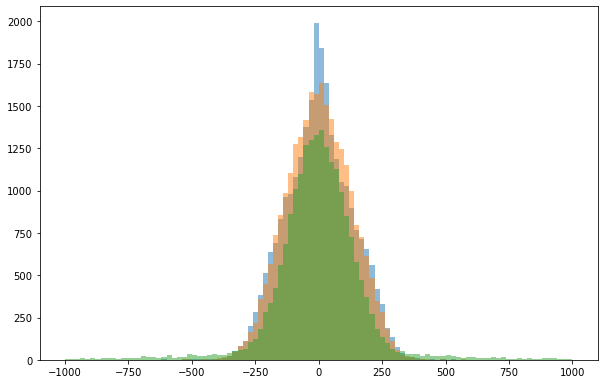

In [51]:
for n in range(len(n_pes)):
    plt.hist(delta_t[n], 100, (-1000, 1000), alpha=0.5);

In [52]:
def title_and_axes(title, x, y, fontsize):
    pylab.title(title, fontsize=fontsize)
    pylab.xlabel(x, fontsize=fontsize)
    pylab.ylabel(y, fontsize=fontsize)
    return

def create_new_figure(kwargs):
    if kwargs.setdefault("new_figure", True):
        plt.figure()
    del kwargs["new_figure"]

def hist(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    y, x, p = plt.hist(*args, **kwargs)
    return y, shift_to_bin_centers(x), p

def axis_info(ax, title, xlabel, ylabel, xlim, ylim, fontsize=14):
    ax.set_title(title, size=fontsize)
    ax.set_xlabel(xlabel, size=fontsize)
    ax.set_ylabel(ylabel, size=fontsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plt_info(title, xlabel, ylabel, xlim, ylim, fontsize=14):
    plt.title(title, size=fontsize)
    plt.xlabel(xlabel, size=fontsize)
    plt.ylabel(ylabel, size=fontsize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    
def label_hist_mm(mu, mu_err, sigma, sigma_err, fwhm, fwhm_err, chi2, dec=3):
    mu_str    = f'$\mu$ = {   np.round(mu,    dec)} ± {np.round(mu_err,    dec)} mm'
    sigma_str = f'$\sigma$ = {np.round(sigma, dec)} ± {np.round(sigma_err, dec)} mm'
    fwhm_str  = f'FWHM res = {np.round(fwhm,  dec)} ± {np.round(fwhm_err,  dec)} mm'
    chi2_str  = f'$\chi^2$ = {np.round(chi2,  dec)}'
    return mu_str + '\n'+ sigma_str + '\n' + fwhm_str + '\n' + chi2_str

def label_hist_rad(mu, mu_err, sigma, sigma_err, fwhm, fwhm_err, dec=5):
    mu_str    = f'$\mu$ = {   np.round(mu,    dec)} ± {np.round(mu_err,    dec)} rad'
    sigma_str = f'$\sigma$ = {np.round(sigma, dec)} ± {np.round(sigma_err, dec)} rad'
    fwhm_str  = f'FWHM res = {np.round(fwhm,  dec)} ± {np.round(fwhm_err,  dec)} rad'
    fwhm_str_mm1 = f'{np.round(fwhm*150, 3)} ± {np.round(fwhm_err*150, 3)} mm'
    fwhm_str_mm2 = f'{np.round(fwhm*180, 3)} ± {np.round(fwhm_err*180, 3)} mm'
    return mu_str + '\n'+ sigma_str + '\n' + fwhm_str + '\n' + fwhm_str_mm1 + ' - ' + fwhm_str_mm2

def label_hist_ps(mu, mu_err, sigma, sigma_err, fwhm, fwhm_err, chi2, dec=3):
    mu_str    = f'$\mu$ = {   np.round(mu,    dec)} ± {np.round(mu_err,    dec)} ps'
    sigma_str = f'$\sigma$ = {np.round(sigma, dec)} ± {np.round(sigma_err, dec)} ps'
    fwhm_str  = f'FWHM res = {np.round(fwhm,  dec)} ± {np.round(fwhm_err,  dec)} ps'
    chi2_str  = f'$\chi^2$ = {np.round(chi2,  dec)}'
    return mu_str + '\n'+ sigma_str + '\n' + fwhm_str + '\n' + chi2_str


def title_and_axes(title, x, y, fontsize):
    pylab.title(title, fontsize=fontsize)
    pylab.xlabel(x, fontsize=fontsize)
    pylab.ylabel(y, fontsize=fontsize)
    return

def fit_gaussian(variable, bins, range_hist, range_fit, max_entries, mm=True):
    
    y, x, _   = hist(variable, bins, range_hist, facecolor='skyblue')
    mu, sigma = norm.fit(variable)
    f         = fitf.fit(fitf.gauss, x, y, (max_entries,mu,sigma), fit_range=range_fit)
    fwhm      = 2.35482 * (np.sqrt(np.var(variable)))
    
    _, mu1,     sigma1     = f .values
    _, mu1_err, sigma1_err = f .errors

    fwhm1, fwhm1_err = sigma1* 2.355, sigma1_err* 2.355
    chi2 = f .chi2
    errs = np.sqrt(y)
    
    if mm:
        pylab.plot(x, fitf.gauss(x, *f.values[:3]), "r--", 
                   label=label_hist_mm(mu1, mu1_err, sigma1, sigma1_err, fwhm1, fwhm1_err, chi2))
    else:
        pylab.plot(x, fitf.gauss(x, *f.values[:3]), "r--", 
                   label=label_hist_ps(mu1, mu1_err, sigma1, sigma1_err, fwhm1, fwhm1_err, chi2, dec=1))
    plt.errorbar(x, y, yerr=errs, fmt='.k', elinewidth=0.5,  linestyle='none', capsize=2, capthick=1)
    pylab.legend(fontsize=13, loc=1)

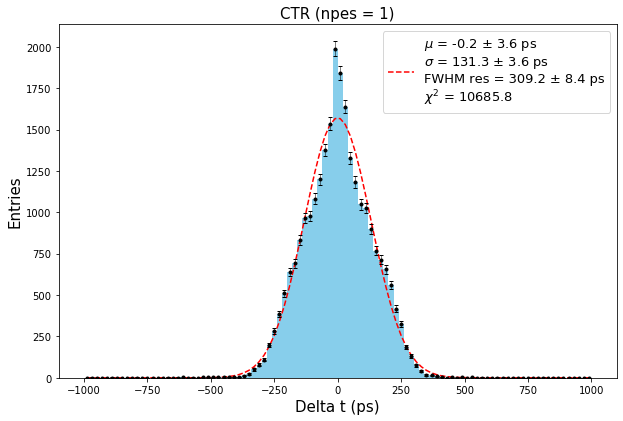

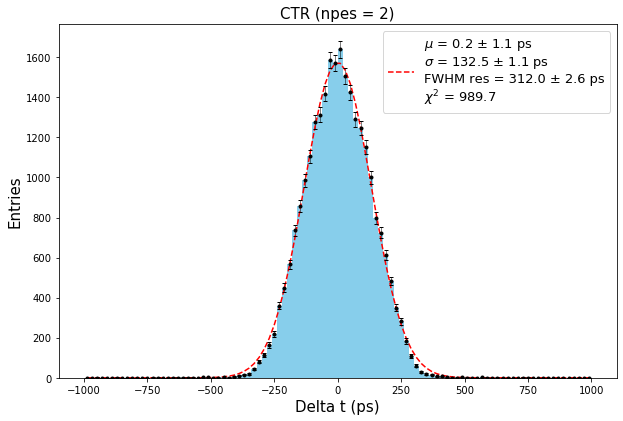

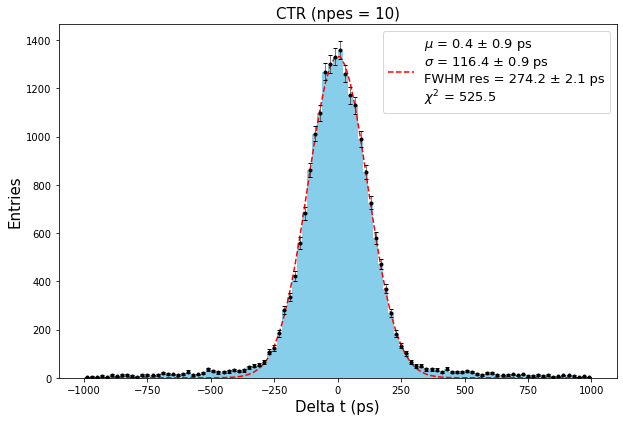

In [57]:
plt.rcParams["figure.figsize"] = 10, 6.5

for n,npe in enumerate(n_pes):
    #plt.hist(delta_t[n], 100);
    fit_gaussian(delta_t[n], 100, (-1000, 1000), (-500, 500), 3000, mm=False)
    title_and_axes(f'CTR (npes = {npe})', 'Delta t (ps)', 'Entries', fontsize=15)


### My script

In [ ]:
filepath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/CTR_studies/data_ctr/'

timestamp_thr   = [0, 0.25, 0.5, 1.0]
num_of_init_pes = [1, 2, 3, 5, 8, 10, 12, 14, 16]

time_diff1_00, time_diff1_01 = np.array([]), np.array([])
time_diff1_02, time_diff1_03 = np.array([]), np.array([])
time_diff1_10, time_diff1_11 = np.array([]), np.array([])
time_diff1_12, time_diff1_13 = np.array([]), np.array([])
time_diff1_20, time_diff1_21 = np.array([]), np.array([])
time_diff1_22, time_diff1_23 = np.array([]), np.array([])
time_diff1_30, time_diff1_31 = np.array([]), np.array([])
time_diff1_32, time_diff1_33 = np.array([]), np.array([])
time_diff1_40, time_diff1_41 = np.array([]), np.array([]) 
time_diff1_42, time_diff1_43 = np.array([]), np.array([])
time_diff1_50, time_diff1_51 = np.array([]), np.array([]) 
time_diff1_52, time_diff1_53 = np.array([]), np.array([])
time_diff1_60, time_diff1_61 = np.array([]), np.array([])
time_diff1_62, time_diff1_63 = np.array([]), np.array([])
time_diff1_70, time_diff1_71 = np.array([]), np.array([])
time_diff1_72, time_diff1_73 = np.array([]), np.array([])
time_diff1_80, time_diff1_81 = np.array([]), np.array([])
time_diff1_82, time_diff1_83 = np.array([]), np.array([])


for filename in os.listdir(filepath):
    if filename.endswith('4_4_4_2.npz'):
        my_file = filepath+filename
        d = np.load(my_file)
        time_diff1_00 = np.concatenate((time_diff1_00, d['time_diff1'][0][0]))
        time_diff1_01 = np.concatenate((time_diff1_01, d['time_diff1'][0][1]))
        time_diff1_02 = np.concatenate((time_diff1_02, d['time_diff1'][0][2]))
        time_diff1_03 = np.concatenate((time_diff1_03, d['time_diff1'][0][3]))
        time_diff1_10 = np.concatenate((time_diff1_10, d['time_diff1'][1][0]))
        time_diff1_11 = np.concatenate((time_diff1_11, d['time_diff1'][1][1]))
        time_diff1_12 = np.concatenate((time_diff1_12, d['time_diff1'][1][2]))
        time_diff1_13 = np.concatenate((time_diff1_13, d['time_diff1'][1][3]))
        time_diff1_20 = np.concatenate((time_diff1_20, d['time_diff1'][2][0]))
        time_diff1_21 = np.concatenate((time_diff1_21, d['time_diff1'][2][1]))
        time_diff1_22 = np.concatenate((time_diff1_22, d['time_diff1'][2][2]))
        time_diff1_23 = np.concatenate((time_diff1_23, d['time_diff1'][2][3]))
        time_diff1_30 = np.concatenate((time_diff1_30, d['time_diff1'][3][0]))
        time_diff1_31 = np.concatenate((time_diff1_31, d['time_diff1'][3][1]))
        time_diff1_32 = np.concatenate((time_diff1_32, d['time_diff1'][3][2]))
        time_diff1_33 = np.concatenate((time_diff1_33, d['time_diff1'][3][3]))
        time_diff1_40 = np.concatenate((time_diff1_40, d['time_diff1'][4][0]))
        time_diff1_41 = np.concatenate((time_diff1_41, d['time_diff1'][4][1]))
        time_diff1_42 = np.concatenate((time_diff1_42, d['time_diff1'][4][2]))
        time_diff1_43 = np.concatenate((time_diff1_43, d['time_diff1'][4][3]))
        time_diff1_50 = np.concatenate((time_diff1_50, d['time_diff1'][5][0]))
        time_diff1_51 = np.concatenate((time_diff1_51, d['time_diff1'][5][1]))
        time_diff1_52 = np.concatenate((time_diff1_52, d['time_diff1'][5][2]))
        time_diff1_53 = np.concatenate((time_diff1_53, d['time_diff1'][5][3]))
        time_diff1_60 = np.concatenate((time_diff1_60, d['time_diff1'][6][0]))
        time_diff1_61 = np.concatenate((time_diff1_61, d['time_diff1'][6][1]))
        time_diff1_62 = np.concatenate((time_diff1_62, d['time_diff1'][6][2]))
        time_diff1_63 = np.concatenate((time_diff1_63, d['time_diff1'][6][3]))
        time_diff1_70 = np.concatenate((time_diff1_70, d['time_diff1'][7][0]))
        time_diff1_71 = np.concatenate((time_diff1_71, d['time_diff1'][7][1]))
        time_diff1_72 = np.concatenate((time_diff1_72, d['time_diff1'][7][2]))
        time_diff1_73 = np.concatenate((time_diff1_73, d['time_diff1'][7][3]))
        time_diff1_80 = np.concatenate((time_diff1_80, d['time_diff1'][8][0]))
        time_diff1_81 = np.concatenate((time_diff1_81, d['time_diff1'][8][1]))
        time_diff1_82 = np.concatenate((time_diff1_82, d['time_diff1'][8][2]))
        time_diff1_83 = np.concatenate((time_diff1_83, d['time_diff1'][8][3]))


## Paola's script:

In [69]:
filepath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/CTR_studies/data_ctr/data_script_Paola/'

timestamp_thr   = [0.25, 0.5]
num_of_init_pes = [1, 2, 5, 10]

reco_r1           = [[] for i in range(len(num_of_init_pes))]
reco_phi1         = [[] for i in range(len(n_pes))]
reco_z1           = [[] for i in range(len(n_pes))]
reco_r2           = [[] for i in range(len(n_pes))]
reco_phi2         = [[] for i in range(len(n_pes))]
reco_z2           = [[] for i in range(len(n_pes))]
first_sipm1_1     = [[] for i in range(len(n_pes))]
first_time1_1     = [[] for i in range(len(n_pes))]
first_sipm2_1     = [[] for i in range(len(n_pes))]
first_time2_1     = [[] for i in range(len(n_pes))]
true_time1        = [[] for i in range(len(n_pes))]
true_time2        = [[] for i in range(len(n_pes))]
max_hit_distance1 = [[] for i in range(len(n_pes))]
max_hit_distance2 = [[] for i in range(len(n_pes))]
event_ids         = [[] for i in range(len(n_pes))]

for n, npe in enumerate(num_of_init_pes):
    thr = 0.25
    for filename in os.listdir(filepath + f'npe{npe}_thr{thr}/'):
        if filename.endswith('_2_4_4_4_2.npz'):
            my_file = filepath + f'npe{npe}_thr{thr}/' + filename
            d = np.load(my_file)
            for i,j in d.items():
                print(i,j)
            for i in d['a_reco_r1']:
                reco_r1[n].append(i)
            for i in d['a_reco_phi1']:
                reco_phi1[n].append(i)
            for i in d['a_reco_z1']:
                reco_z1[n].append(i)
            for i in d['a_reco_r2']:
                reco_r2[n].append(i)
            for i in d['a_reco_phi2']:
                reco_phi2[n].append(i)
            for i in d['a_reco_z2']:
                reco_z2[n].append(i)
            for i in d['a_first_sipm1_1']:
                first_sipm1_1[n].append(i)
            for i in d['a_first_time1_1']:
                first_time1_1[n].append(i)
            for i in d['a_first_sipm2_1']:
                first_sipm2_1[n].append(i)
            for i in d['a_first_time2_1']:
                first_time2_1[n].append(i)
            for i in d['a_true_time1']:
                true_time1[n].append(i)
            for i in d['a_true_time2']:
                true_time2[n].append(i)
            for i in d['a_max_hit_distance1']:
                max_hit_distance1[n].append(i)
            for i in d['a_max_hit_distance2']:
                max_hit_distance2[n].append(i)
            for i in d['a_event_ids']:
                event_ids[n].append(i)
        
        
        
        
for n in range(len(n_pes)):
    reco_r1          [n] = np.array(reco_r1          [n])
    reco_phi1        [n] = np.array(reco_phi1        [n])
    reco_z1          [n] = np.array(reco_z1          [n])
    reco_r2          [n] = np.array(reco_r2          [n])
    reco_phi2        [n] = np.array(reco_phi2        [n])
    reco_z2          [n] = np.array(reco_z2          [n])
    first_sipm1_1    [n] = np.array(first_sipm1_1    [n])
    first_time1_1    [n] = np.array(first_time1_1    [n])
    first_sipm2_1    [n] = np.array(first_sipm2_1    [n])
    first_time2_1    [n] = np.array(first_time2_1    [n])
    true_time1       [n] = np.array(true_time1       [n])
    true_time2       [n] = np.array(true_time2       [n])
    max_hit_distance1[n] = np.array(max_hit_distance1[n])
    max_hit_distance2[n] = np.array(max_hit_distance2[n])
    event_ids        [n] = np.array(event_ids        [n])
    

reco_x1 = np.array([r1*np.cos(phi1) for r1,phi1 in zip(reco_r1, reco_phi1)])
reco_y1 = np.array([r1*np.sin(phi1) for r1,phi1 in zip(reco_r1, reco_phi1)])
reco_x2 = np.array([r2*np.cos(phi2) for r2,phi2 in zip(reco_r2, reco_phi2)])
reco_y2 = np.array([r2*np.sin(phi2) for r2,phi2 in zip(reco_r2, reco_phi2)])

a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids

a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids

a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids

a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1

a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1

a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids []
a_reco_r1 []
a_reco_phi1 []
a_reco_z1 []
a_reco_r2 []
a_reco_phi2 []
a_reco_z2 []
a_first_sipm1_1 []
a_first_time1_1 []
a_first_sipm2_1 []
a_first_time2_1 []
a_true_time1 []
a_true_time2 []
a_max_hit_distance1 []
a_max_hit_distance2 []
a_event_ids

In [68]:
reco_r1

[array([], dtype=float64), array([], dtype=float64), [], []]

In [65]:
ave_speed_in_LXe  = 0.210 # mm/ps
speed_in_vacuum   = 0.299792458 # mm/ps
peak_speed_in_LXe = speed_in_vacuum/1.69

delta_t  = []
delta_t2 = []
for n in range(len(n_pes)):
    cart1 = np.array([reco_x1[n], reco_y1[n], reco_z1[n]]).T
    cart2 = np.array([reco_x2[n], reco_y2[n], reco_z2[n]]).T
    
    ### Distance between interaction point and center of the geometry
    dg1 = np.linalg.norm(cart1, axis=1)
    dg2 = np.linalg.norm(cart2, axis=1)
    
    dp1 = np.linalg.norm(np.subtract(cart1, first_sipm1_1[n]), axis=1)
    dp2 = np.linalg.norm(np.subtract(cart2, first_sipm2_1[n]), axis=1)
    
    dt  = first_time2_1[n] - first_time1_1[n] + (dp1 - dp2)/ave_speed_in_LXe  + (dg1 - dg2)/speed_in_vacuum
    dt2 = first_time2_1[n] - first_time1_1[n] + (dp1 - dp2)/peak_speed_in_LXe + (dg1 - dg2)/speed_in_vacuum
    
    delta_t .append(dt)
    delta_t2.append(dt2)
    
delta_t  = np.array(delta_t )
delta_t2 = np.array(delta_t2)

ValueError: operands could not be broadcast together with shapes (0,3) (0,) 